In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df_weather_overtake = pd.read_csv("./data/weather_overtake_bs_completed.csv") 

# Análisis circuitos

## 1.1 Circuitos Ranking mojado

In [24]:
wet_races = df_weather_overtake[df_weather_overtake['weather'] == 'Wet']

apariciones_por_circuito = wet_races['Race'].value_counts()
adelantamientos_por_circuito = wet_races.groupby('Race')['Overtakes'].sum()
weather_year = wet_races.groupby('Race').agg({'weather': 'first', 'Season': 'first'})

df_ranking_wet_races = pd.DataFrame({'Cantidad de Adelantamientos': adelantamientos_por_circuito,'Veces Wet': apariciones_por_circuito})
df_ranking_wet_races = df_ranking_wet_races.join(weather_year)
df_ranking_wet_races['Media de Adelantamientos'] = round(df_ranking_wet_races['Cantidad de Adelantamientos'] / df_ranking_wet_races['Veces Wet'], 1)

total_apariciones_por_circuito = df_weather_overtake['Race'].value_counts()
df_ranking_wet_races['Media Veces Wet (%)'] = round((df_ranking_wet_races['Veces Wet'] / total_apariciones_por_circuito) * 100, 1)
df_ranking_wet_races = df_ranking_wet_races.sort_values(by='Media de Adelantamientos', ascending=False)

df_ranking_wet_races.sort_values(by='Media Veces Wet (%)', ascending=False, inplace=True)
df_ranking_wet_races = df_ranking_wet_races[df_ranking_wet_races['Cantidad de Adelantamientos'] != 226 ]
df_ranking_wet_races.head(23)
df_ranking_wet_races_solo_wet = df_ranking_wet_races[["Media Veces Wet (%)"]]
df_ranking_wet_races_solo_wet

,Media Veces Wet (%)
Race,
Emilia-Romagna,66.7
South Korea,50.0
Belgium,31.6
China,31.2
Malaysia,26.3
Detroit,25.0
South Africa,25.0
Brazil,23.1
Japan,22.9


## 1.2 Circuitos Ranking Media adelantamientos

In [25]:
apariciones_por_circuito = df_weather_overtake['Race'].value_counts()
adelantamientos_por_circuito = df_weather_overtake.groupby('Race')['Overtakes'].sum()
weather_season = df_weather_overtake.groupby('Race').agg({'weather': 'first', 'Season': 'first'})

df_ranking_races = pd.DataFrame({'Cantidad de Adelantamientos': adelantamientos_por_circuito,'Apariciones': apariciones_por_circuito})
df_ranking_races = df_ranking_races.join(weather_season)
df_ranking_races['Media de Adelantamientos'] = round(df_ranking_races['Cantidad de Adelantamientos'] / df_ranking_races['Apariciones'],1)

# Filtro
#df_ranking_races = df_ranking_races[df_ranking_races['Apariciones'] >= 5] 
df_ranking_races = df_ranking_races.sort_values(by='Media de Adelantamientos', ascending=False)
df_ranking_races = df_ranking_races[df_ranking_races['Cantidad de Adelantamientos'] != 703 ]
df_ranking_races


,Cantidad de Adelantamientos,Apariciones,weather,Season,Media de Adelantamientos
Race,,,,,
Las Vegas,99,1,Dry,2023,99.0
Netherlands,347,5,Dry,1985,69.4
China,964,16,Wet,2009,60.2
Miami,114,2,Dry,2022,57.0
Sakhir,51,1,Dry,2020,51.0
Bahrain,969,19,Dry,2009,51.0
South Korea,199,4,Wet,2010,49.8
Qatar,97,2,Dry,2021,48.5
Detroit,189,4,Wet,1987,47.2


## Join

In [26]:
df_best_circuits = pd.merge(df_ranking_races,df_ranking_wet_races_solo_wet, on="Race", how="left")
# filtro_wet_percent = df_best_circuits["Media Veces Wet (%)"] >= 5
df_best_circuits = df_best_circuits.reset_index()


## 1.3 Gráfico mejores circuitos para el espectaculo

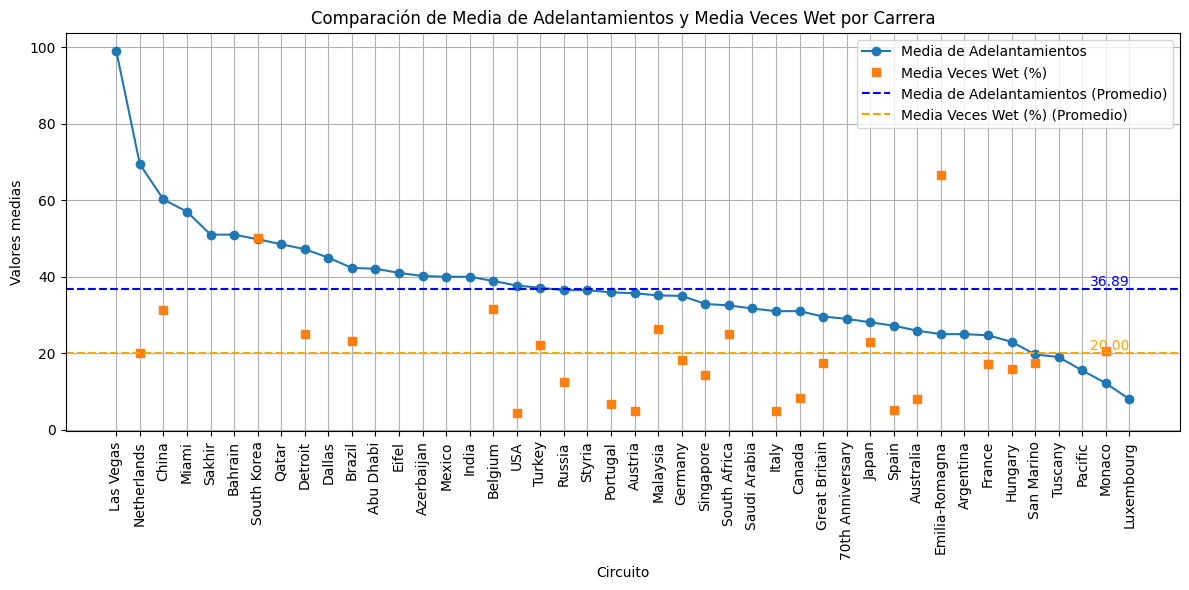

In [27]:
plt.figure(figsize=(12,6))


plt.plot(df_best_circuits['Race'], df_best_circuits['Media de Adelantamientos'], marker='o', label='Media de Adelantamientos')
plt.plot(df_best_circuits['Race'], df_best_circuits['Media Veces Wet (%)'], marker='s', label='Media Veces Wet (%)', linestyle="None")

media_adelantamientos = df_best_circuits['Media de Adelantamientos'].mean()
media_veces_wet = df_best_circuits['Media Veces Wet (%)'].mean()

plt.axhline(y=media_adelantamientos, color='blue', linestyle='--', label='Media de Adelantamientos (Promedio)')
plt.axhline(y=media_veces_wet, color='orange', linestyle='--', label='Media Veces Wet (%) (Promedio)')

plt.text(x=len(df_best_circuits)-1, y=media_adelantamientos, 
         s=f'{media_adelantamientos:.2f}', color='blue', 
         verticalalignment='bottom', horizontalalignment='right')
plt.text(x=len(df_best_circuits)-1, y=media_veces_wet, 
         s=f'{media_veces_wet:.2f}', color='orange', 
         verticalalignment='bottom', horizontalalignment='right')

plt.title('Comparación de Media de Adelantamientos y Media Veces Wet por Carrera')
plt.xlabel('Circuito')
plt.ylabel('Valores medias')
plt.xticks(rotation=90) 
plt.legend()
plt.grid()

plt.savefig("./img/5_Circuitos/Comparacion_media_adelantamientos_y_veces_wet.png", bbox_inches='tight')  

plt.tight_layout()
plt.show()

## 1.4 Número de circuitos por encima de las medias

In [28]:
media_adelantamientos = df_best_circuits['Media de Adelantamientos'].mean()
media_veces_wet = df_best_circuits['Media Veces Wet (%)'].mean()

circuitos_por_encima_adelantamientos = df_best_circuits[df_best_circuits['Media de Adelantamientos'] > media_adelantamientos].shape[0]
circuitos_por_encima_wet = df_best_circuits[df_best_circuits['Media Veces Wet (%)'] > media_veces_wet].shape[0]

resultados = pd.DataFrame({
    'Metric': ['Media de Adelantamientos', 'Media Veces Wet (%)'],
    'Circuitos por encima de la media': [circuitos_por_encima_adelantamientos, circuitos_por_encima_wet]
})

print(resultados)

                     Metric  Circuitos por encima de la media
0  Media de Adelantamientos                                19
1       Media Veces Wet (%)                                12


## 1.5 Listado circuitos por encima de las medias

In [29]:
media_adelantamientos = df_best_circuits['Media de Adelantamientos'].mean()
media_veces_wet = df_best_circuits['Media Veces Wet (%)'].mean()

circuitos_por_encima_adelantamientos = df_best_circuits[df_best_circuits['Media de Adelantamientos'] > media_adelantamientos]
circuitos_por_encima_wet = df_best_circuits[df_best_circuits['Media Veces Wet (%)'] > media_veces_wet]

resultados_adelantamientos = pd.DataFrame({
    'Circuito': circuitos_por_encima_adelantamientos['Race'],
    'Media de Adelantamientos': circuitos_por_encima_adelantamientos['Media de Adelantamientos']
})

resultados_wet = pd.DataFrame({
    'Circuito': circuitos_por_encima_wet['Race'],
    'Media Veces Wet (%)': circuitos_por_encima_wet['Media Veces Wet (%)']
})

resultados_wet = resultados_wet.sort_values(by='Media Veces Wet (%)', ascending=False)


print("Circuitos por encima de la media de adelantamientos:")
print(resultados_adelantamientos)

print("\nCircuitos por encima de la media de wet (ordenados):")
print(resultados_wet)

Circuitos por encima de la media de adelantamientos:
       Circuito  Media de Adelantamientos
0     Las Vegas                      99.0
1   Netherlands                      69.4
2         China                      60.2
3         Miami                      57.0
4        Sakhir                      51.0
5       Bahrain                      51.0
6   South Korea                      49.8
7         Qatar                      48.5
8       Detroit                      47.2
9        Dallas                      45.0
10       Brazil                      42.3
11    Abu Dhabi                      42.1
12        Eifel                      41.0
13   Azerbaijan                      40.2
14       Mexico                      40.0
15        India                      40.0
16      Belgium                      38.9
17          USA                      37.7
18       Turkey                      37.1

Circuitos por encima de la media de wet (ordenados):
          Circuito  Media Veces Wet (%)
35  Emilia-Ro